# Gaussian kernel and K-NN density estimations

Gaussian kernel and K-NN density estimators are used to approximate the pdf of 100 data points, represented by a 100-dimensional vector. The purpose of this is to show the accuracy of each non-parametric method.

In [245]:
import numpy as np
import matplotlib.pyplot as plt

hor_axis = np.linspace(-5, 5, 100) # 100 evenly distributed values, with 0 as the center, where the mean will be located
sample = np.random.normal(0, 1, 100) # Unordered set of values extracted from a random Gaussian distribution

N = len(hor_axis) # Length of array
mean = np.mean(sample) # Mean of samples
var = np.var(sample) # Variance of samples

The following function returns the Gaussian/Normal distribution, i.e. the real density distribution. It uses the standard formula for the distribution.

In [246]:
def Gaussian(m,v,x):
    const = 1/(np.sqrt(2*np.pi)*v)
    exp = np.exp(-0.5*(x-m)**2/(v**2))
    gauss = const*exp
    return gauss

Now the function for the Kernel Density Estimation (KDE) is defined, which follows the Gaussian kernel method. In (1), for each point x, every data point x_n is subtracted (inside the exponential) and then all subtraction for each x are added up, per the formula for Gaussian KDEs. This outputs a vector of 100 entries.

In [247]:
def kde(x, x_n, h):
    const = 1/(np.sqrt(2*np.pi)*h*N) 
    exp = np.sum(np.exp(-0.5*((x[np.newaxis, :]-x_n[:, np.newaxis])**2/h**2)), axis=0) # (1)
    est = const*exp
    return est

The (real) Gaussian distribution and the Gaussian KDE are plotted together to show the comparison, using an edge length of 0.6. The KDE distribution resembles the Gaussian a lot, which is expected since the data values effectively correspond to a Gaussian, and that is the distribution after which this kernel method is modelled.

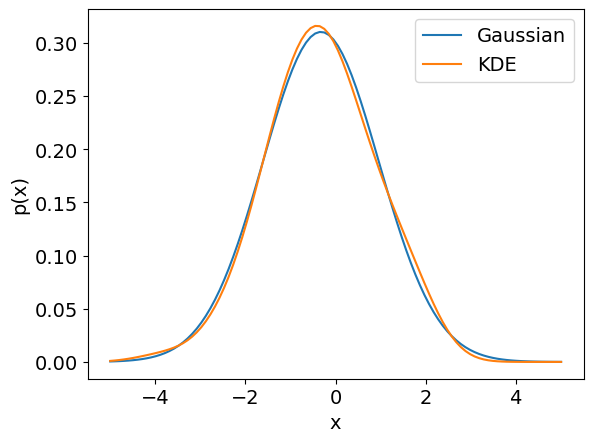

In [248]:
plt.plot(hor_axis, Gaussian(mean, var, hor_axis), label = 'Gaussian')
plt.plot(hor_axis, kde(hor_axis, sample, 0.6), label = 'KDE')
plt.xlabel('x', fontsize=14)
plt.ylabel('p(x)', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.show()

The K-Nearest Neighbor (K-NN) density estimation function is then designed. For (1), the (absolute) distance between each x and each data point x_n is calculated. This generates a 100x100 array. In (2), the distance values are sorted from lowest to highest, with each row k-1 holding the distance values for the k nearest neighbors. For instance, for 1 nearest neighbor, the distances are stores in the 0th row. Thanks to this, for (3) the amount of data points has duplicated, thus we use 2*N.

In [249]:
def knn(x, x_n, k):
    distances = np.abs(x[np.newaxis,:]-x_n[:,np.newaxis]) # (1)
    distances = np.sort(distances, axis=0)                # (2)
    est = k/(2*N*distances[k-1,:])                        # (3)
    return est

The (real) Gaussian distribution and the K-NN density estimation are now plotted together, using k=30.

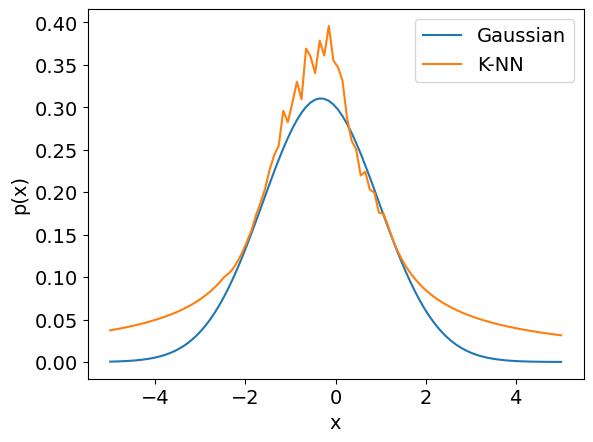

In [250]:
plt.plot(hor_axis, Gaussian(mean, var, hor_axis), label = 'Gaussian')
plt.plot(hor_axis, knn(hor_axis, sample, 30), label = 'K-NN')
plt.xlabel('x', fontsize=14)
plt.ylabel('p(x)', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.show()

It is evinced that K-NN is not as accurate as KDE, with the distribution being noisier and flattening at a slower rate. This is expected, since the generated data corresponds to a Gaussian pdf, so KDE is more appropriate. In general, K-NN can be more flexible with the data and fit better for other kinds of distribution. The parameters h and k can also be changed to try and find more accurate estimations in concordance with the Gaussian one.